In [2]:
import pandas as pd

In [3]:
# Load the 'heart.csv' dataset
heart_df = pd.read_csv('heart.csv')

# Display the structure and a brief summary of the dataset
heart_df.info()
heart_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

The 'heart.csv' dataset contains 1025 rows and 14 columns, comprising mostly integer data types with one float column. It includes attributes related to patient details and heart conditions such as age, sex, cholesterol levels, and target (presumably an indicator for heart disease). All columns have non-null values.

> Analyze the correlation between features in the heart dataset.
Implement a basic classification model using the heart dataset.

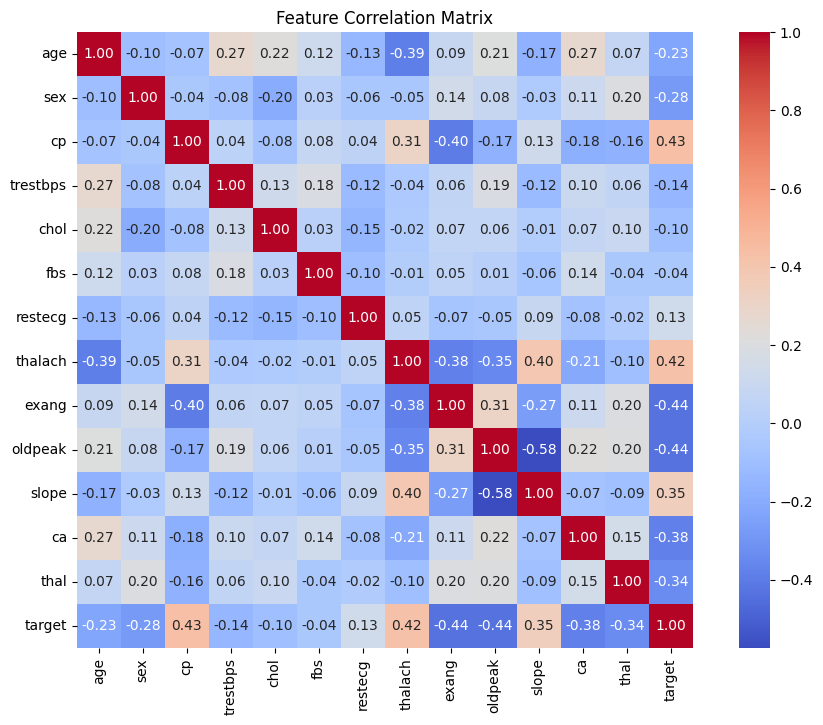

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = heart_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Preparing data for classification
X = heart_df.drop(columns=['target'])  # Features
y = heart_df['target']                # Target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a basic classification model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



The RandomForestClassifier achieved excellent performance on the dataset, with 98% overall accuracy and high precision, recall, and F1-scores for both classes.

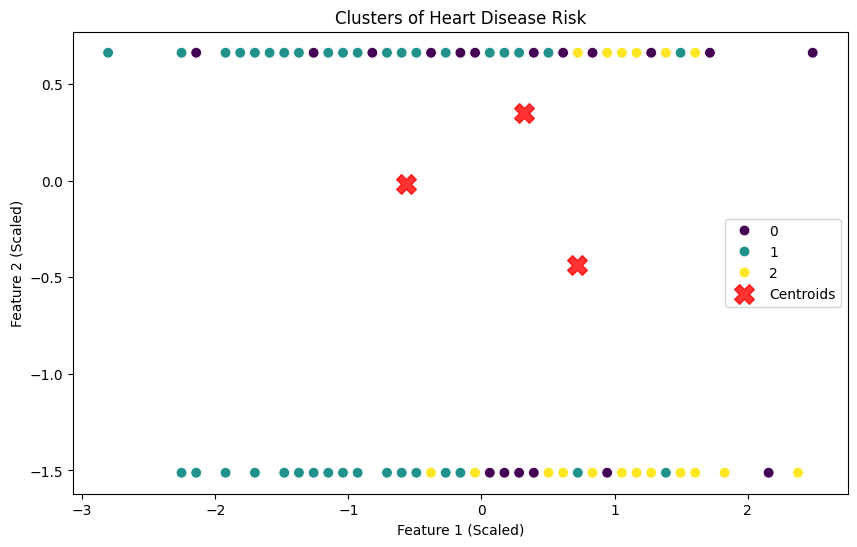

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scaling the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Performing K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
heart_df['cluster'] = kmeans.fit_predict(scaled_features)
kmeans_centers = kmeans.cluster_centers_

# Visualizing cluster distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], 
                hue=heart_df['cluster'], palette='viridis', s=60)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='red', s=200, alpha=0.8, marker='X', label='Centroids')
plt.title('Clusters of Heart Disease Risk')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()

The scatterplot maps the clustered data points based on the scaled features, with the K-Means algorithm identifying three clusters that likely represent varying heart disease risk levels. Cluster centroids (red markers) signify the average position for each risk group. The distribution of data points within and around these centroids offers insights into group distinctions in heart-related attributes.

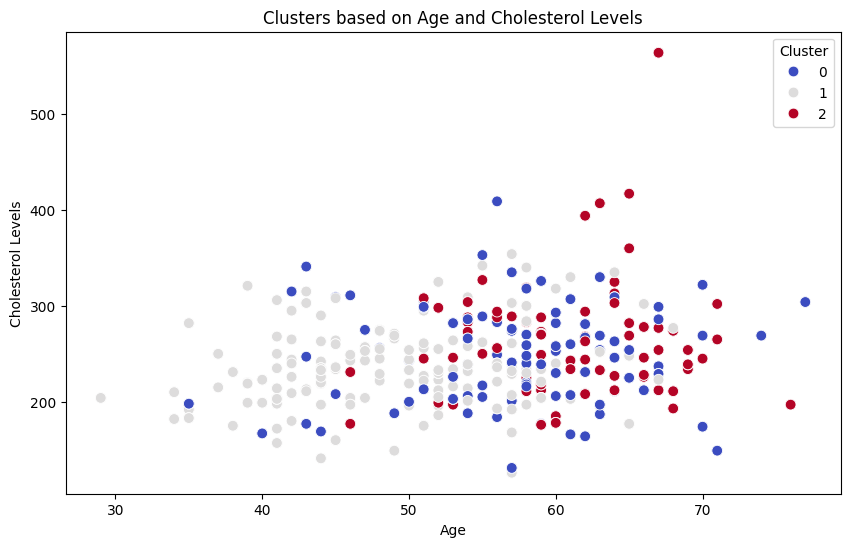

In [7]:
# Visualizing cluster distribution with respect to two specific features, 'age' and 'chol'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=heart_df['age'], y=heart_df['chol'], hue=heart_df['cluster'], palette='coolwarm', s=60)
plt.title('Clusters based on Age and Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.legend(title='Cluster')
plt.show()

> Generate a detailed analysis on the significance of clustering results for heart disease risk.

In [8]:
# Analyzing clustering results and their significance
cluster_analysis = heart_df.groupby('cluster').mean()

# Overall statistics of clusters
cluster_stats = heart_df['cluster'].value_counts()

# Structure for the detailed analysis output
analysis_output = {
    'Cluster Statistics': cluster_stats,
    'Mean Feature Values by Cluster': cluster_analysis
}

analysis_output

{'Cluster Statistics': cluster
 1    476
 0    315
 2    234
 Name: count, dtype: int64,
 'Mean Feature Values by Cluster':                age       sex        cp    trestbps        chol       fbs  \
 cluster                                                                    
 0        57.320635  0.857143  0.200000  129.323810  248.774603  0.098413   
 1        49.308824  0.686975  1.178571  125.138655  235.491597  0.037815   
 2        60.974359  0.495726  1.461538  147.858974  263.641026  0.444444   
 
           restecg     thalach     exang   oldpeak     slope        ca  \
 cluster                                                                 
 0        0.441270  129.431746  0.800000  1.830794  1.050794  1.193651   
 1        0.644958  163.663866  0.094538  0.448529  1.691176  0.411765   
 2        0.414530  146.012821  0.205128  1.316667  1.213675  0.858974   
 
              thal    target  
 cluster                      
 0        2.631746  0.120635  
 1        2.218487  0.762

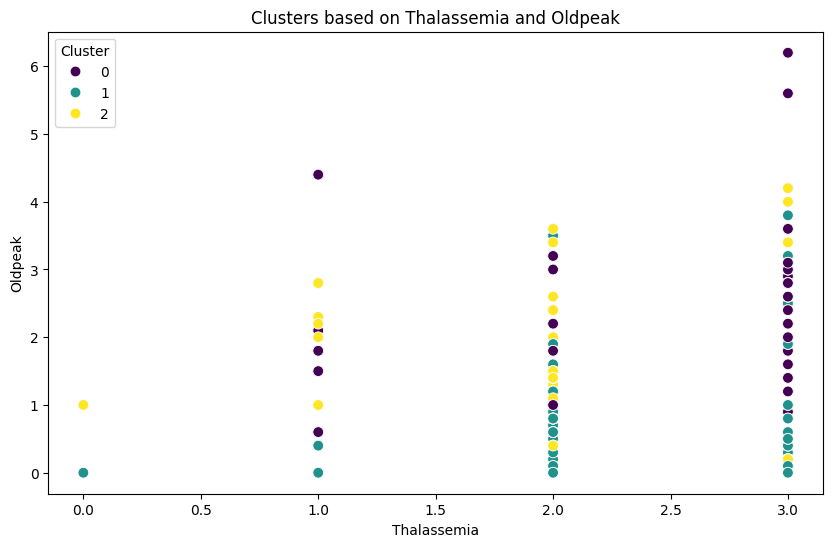

In [9]:
# 1. Visualizing Clusters by 'thal' and 'oldpeak'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=heart_df['thal'], y=heart_df['oldpeak'], hue=heart_df['cluster'], palette='viridis', s=60)
plt.title('Clusters based on Thalassemia and Oldpeak')
plt.xlabel('Thalassemia')
plt.ylabel('Oldpeak')
plt.legend(title='Cluster')
plt.show()

This visualization uses 'thal' (thallium test results) and 'oldpeak' (ST depression induced by exercise relative to rest) to display the clusters. It highlights how specific medical test results contribute to risk stratification for heart disease. The clusters indicate varying risk patterns, potentially emphasizing higher 'oldpeak' values and specific 'thal' categories as markers for increased heart disease risk. 

/tmp/ipykernel_33021/3762792081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=heart_df['cluster'], y=heart_df['chol'], palette='Set2')


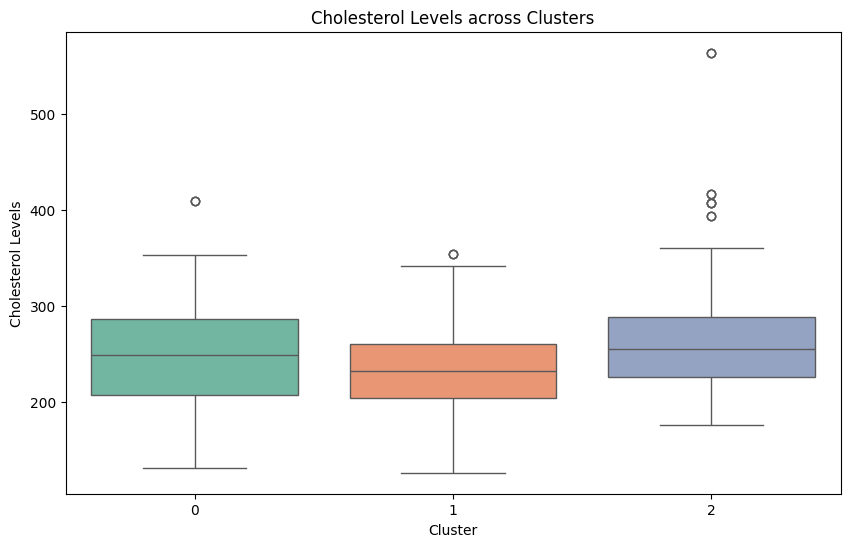

In [10]:
# 2. Boxplot of Cholesterol Levels across Clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_df['cluster'], y=heart_df['chol'], palette='Set2')
plt.title('Cholesterol Levels across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Cholesterol Levels')
plt.show()

This boxplot depicts cholesterol levels across the clusters, indicating differences in average levels and variability. Observing higher cholesterol values in certain clusters aligns with their classification as higher-risk groups for heart disease. Additional patterns in cholesterol distributions across clusters provide deeper insights into risks.

/tmp/ipykernel_33021/1520856062.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster')


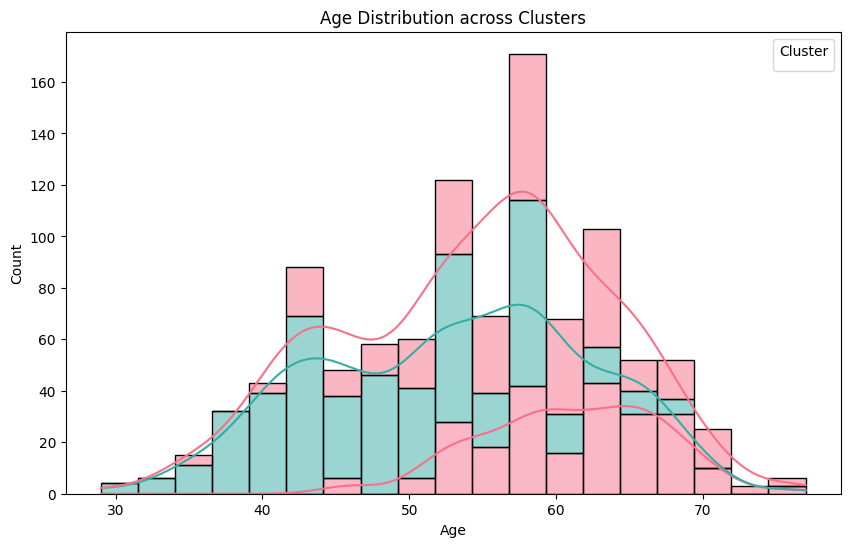

In [11]:
# 3. Distribution of Age within Each Cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_df, x='age', hue='cluster', multiple='stack', palette='husl', kde=True)
plt.title('Age Distribution across Clusters')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

This histogram visualizes age distribution within each cluster, showing how different age groups align with heart disease risk categories. Patterns, such as a cluster predominantly consisting of older individuals, can indicate age as a significant factor in defining risk levels. 

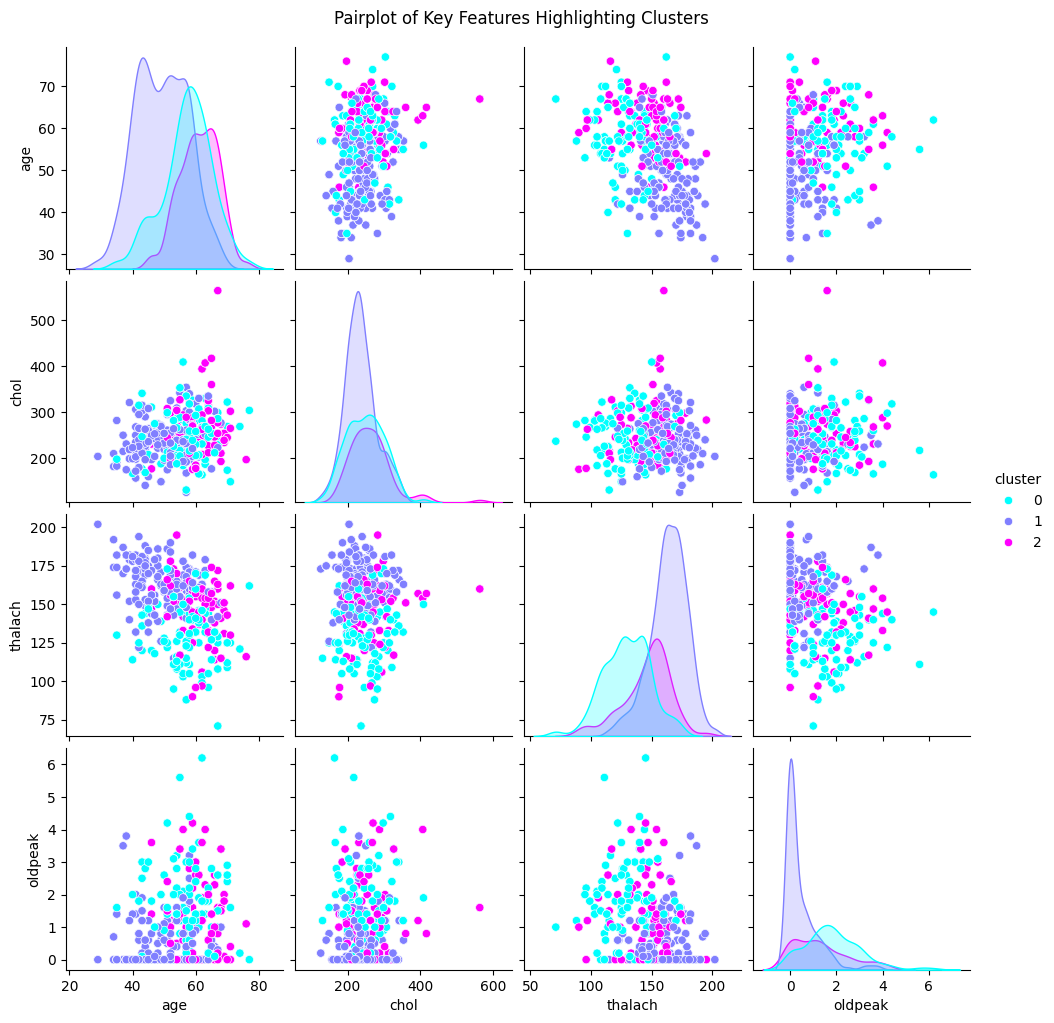

In [12]:
# 4. Pairplot for Key Features Highlighting Clusters
key_features = ['age', 'chol', 'thalach', 'oldpeak']
sns.pairplot(heart_df, vars=key_features, hue='cluster', palette='cool')
plt.suptitle('Pairplot of Key Features Highlighting Clusters', y=1.02)
plt.show()

This pairplot displays relationships between key features ('age', 'chol', 'thalach', and 'oldpeak') across clusters. It highlights how risk groups differ in feature combinations, such as low 'thalach' paired with high 'oldpeak' in certain clusters signaling elevated risks. These correlations can guide targeted interventions. 

>  visualizations comparing cluster features and potential risk factors for heart disease.

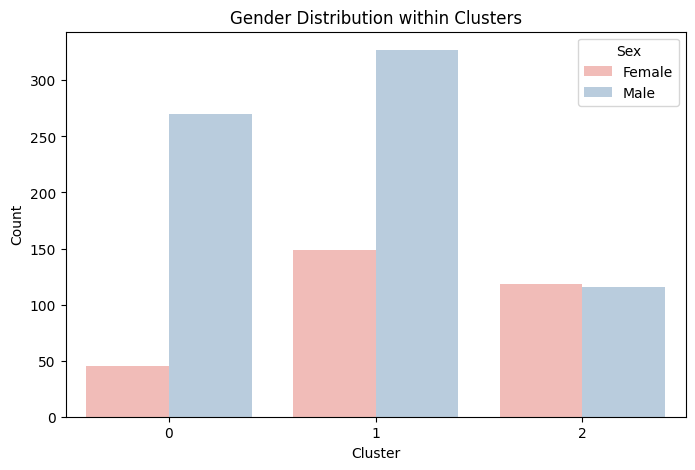

In [13]:
# 5. Barplot showing the distribution of 'sex' across clusters
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', hue='sex', data=heart_df, palette='Pastel1')
plt.title('Gender Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

This barplot visualizes the distribution of gender (male and female) within the clusters. It appears that males dominate certain clusters, potentially signaling higher risk factors related to specific heart disease markers. 

>  visualizations to compare age and cholesterol levels across heart disease risk clusters.

<Figure size 1000x600 with 0 Axes>

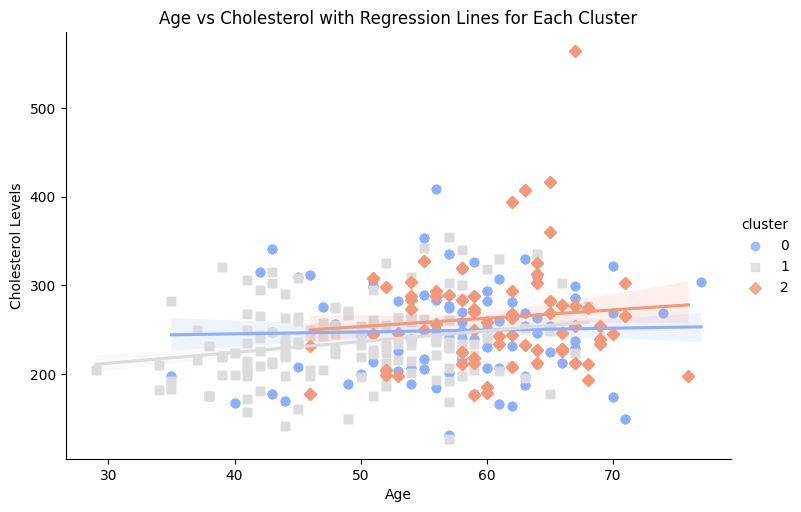

In [14]:
# 6. Scatterplot with Regression Line for Age vs Cholesterol across Clusters
plt.figure(figsize=(10, 6))
sns.lmplot(data=heart_df, x='age', y='chol', hue='cluster', palette='coolwarm', aspect=1.5, markers=['o', 's', 'D'])
plt.title('Age vs Cholesterol with Regression Lines for Each Cluster')
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.show()